In [ ]:
# 챕터4 opencv 주요기능

In [1]:
import cv2 as cv

In [2]:
import mss
import cv2 as cv
import numpy as np

# 특정 영역의 좌표와 크기 지정 (top, left, width, height)
capture_region = {"top": 100, "left": 100, "width": 800, "height": 600}

# 캡처된 이미지를 축소할 스케일 비율
scale_factor = 0.5

with mss.mss() as sct:
    while True:
        # 지정한 영역을 캡처
        # cap = cv.VideoCapture(0) # 0 캠 연결시 또는 동영상파일 경로
        # ret, img = cap.read()
        screenshot = sct.grab(capture_region)
        img = np.array(screenshot)

        # OpenCV BGR로 변환 (필요한 경우)
        img_bgr = cv.cvtColor(img, cv.COLOR_RGBA2BGR)

        # 이미지 스케일링
        scaled_img = cv.resize(img_bgr, (0, 0), fx=scale_factor, fy=scale_factor)

        # 결과를 OpenCV 창으로 표시
        cv.imshow('Scaled Capture', scaled_img)

        # 'q' 키를 누르면 종료
        if cv.waitKey(0) == ord('q'):
            break

cv.destroyAllWindows()


In [2]:
import cv2 as cv

# 비디오 파일 경로
video_path = r'C:\source\exercise\image\walking.avi'

# 비디오 캡처 객체 생성
cap = cv.VideoCapture(video_path)

# 비디오 파일이 열리지 않으면 오류 메시지 출력
if not cap.isOpened():
    print("비디오 파일을 열 수 없습니다.")
    exit()

# 비디오를 재생
while True:
    ret, frame = cap.read()  # 프레임을 읽어옴

    # 프레임을 읽을 수 없으면(예: 비디오가 끝난 경우) 루프 종료
    if not ret:
        print("비디오 재생이 완료되었습니다.")
        break

    cv.imshow('Video Playback', frame)  # 프레임을 화면에 표시

    # 'q' 키를 누르면 재생 종료
    if cv.waitKey(25) == ord('q'): # 1000 / 25 = 40 frame
        break

# 캡처 객체와 창 닫기
cap.release()
cv.destroyAllWindows()


비디오 재생이 완료되었습니다.


In [15]:
import cv2 as cv
import numpy as np
img_path = 'C:\source\exercise\image\강사 윤기원.png'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img.shape
cv.line(img, (50,50), (150, 50), (255,0,0), cv.LINE_4) #좌상단 0,0  (B, G, R)
cv.line(img, (50,50), (50, 150), (0,0,255), cv.LINE_AA) #좌상단 0,0  (B, G, R)
cv.rectangle(img, (60,60), (150, 150), (0,0,255), thickness=2)
cv.drawMarker(img, (20,20), color=(0,0,255), markerType=cv.MARKER_SQUARE, markerSize=20)
cv.circle(img, (100,100), radius=20, thickness=1, color=(0,0,255)) # 원
pts1 = np.array([[50,50],[150,150],[100,140],[150,200]])
cv.polylines(img, [pts1], isClosed=False, color=(0,0,255))
cv.putText(img, 'sixtick', (100,100),color=(0,0,255), fontFace=cv.FONT_HERSHEY_PLAIN, fontScale=1)
win_name = 'test'
cv.namedWindow(win_name, cv.WINDOW_NORMAL)
cv.imshow(win_name, img)

if cv.waitKey(0) == ord('q'): # 1000 / 25 = 40 frame
    cv.destroyAllWindows()
# help(cv.line)


In [5]:
1000 / 40

25.0

In [7]:
import cv2 as cv
import numpy as np

# 빈 이미지 생성 (검정 배경)
image = np.zeros((500, 500, 3), dtype=np.uint8)

# 집 모양을 그리기 위한 선 그리기

# 벽 부분 (사각형)
cv.line(image, (100, 300), (400, 300), (255, 0, 0), 3)  # 바닥
cv.line(image, (100, 300), (100, 100), (255, 0, 0), 3)  # 왼쪽 벽
cv.line(image, (100, 100), (400, 100), (255, 0, 0), 3)  # 위쪽 벽
cv.line(image, (400, 100), (400, 300), (255, 0, 0), 3)  # 오른쪽 벽

# 지붕 부분 (삼각형)
cv.line(image, (100, 100), (250, 50), (0, 255, 0), 3)  # 왼쪽 지붕
cv.line(image, (250, 50), (400, 100), (0, 255, 0), 3)  # 오른쪽 지붕

# 창문 (사각형)
cv.line(image, (150, 200), (250, 200), (0, 0, 255), 2)  # 창문 상단
cv.line(image, (150, 200), (150, 250), (0, 0, 255), 2)  # 창문 왼쪽
cv.line(image, (250, 200), (250, 250), (0, 0, 255), 2)  # 창문 오른쪽
cv.line(image, (150, 250), (250, 250), (0, 0, 255), 2)  # 창문 하단

# 문 (사각형)
cv.line(image, (300, 200), (350, 200), (0, 255, 255), 2)  # 문 상단
cv.line(image, (300, 200), (300, 300), (0, 255, 255), 2)  # 문 왼쪽
cv.line(image, (350, 200), (350, 300), (0, 255, 255), 2)  # 문 오른쪽
cv.line(image, (300, 300), (350, 300), (0, 255, 255), 2)  # 문 하단

# 이미지 표시
cv.imshow('House Drawing', image)
cv.waitKey(0)
cv.destroyAllWindows()


In [1]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('../img/girl.jpg')

#--② 마스크 만들기
mask = np.zeros(img.shape[:2], dtype=np.uint8)
cv2.circle(mask, (150,140), 100, (255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, img, mask=mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--①이미지 읽어서 YUV 컬러스페이스로 변경
img = cv2.imread(r'C:\source\exercise\opencv_study\screenshot.png')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

#--② 밝기 채널에 대해서 이퀄라이즈 적용
img_eq = img_yuv.copy()
img_eq[:,:,0] = cv2.equalizeHist(img_eq[:,:,0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

#--③ 밝기 채널에 대해서 CLAHE 적용
img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8)) #CLAHE 생성
img_clahe[:,:,0] = clahe.apply(img_clahe[:,:,0])           #CLAHE 적용
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

#--④ 결과 출력
cv2.imshow('Before', img)
cv2.imshow('CLAHE', img_clahe)
cv2.imshow('equalizeHist', img_eq)
cv2.waitKey()
cv2.destroyAllWindows()
#C:\source\insightbook.opencv_project_python\img\bright.jpg

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('C:\source\exercise\opencv_study\screenshot.png')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

#--⑤ 역투영된 결과를 마스킹해서 결과를 출력하는 공통함수
def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

#--⑥ 직접 구현한 역투영 함수
def backProject_manual(hist_roi):
    #--⑦ 전체 영상에 대한 H,S 히스토그램 계산
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256])
    #--⑧ 선택영역과 전체 영상에 대한 히스토그램 그램 비율계산
    hist_rate = hist_roi/ (hist_img + 1)
    #--⑨ 비율에 맞는 픽셀 값 매핑
    h,s,v = cv2.split(hsv_img)
    bp = hist_rate[h.ravel(), s.ravel()]

    bp = np.minimum(bp, 1)
    bp = bp.reshape(hsv_img.shape[:2])
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    #--⑩ 역 투영 결과로 마스킹해서 결과 출력
    masking(bp,'result_manual')
 
# OpenCV API로 구현한 함수 ---⑪ 
def backProject_cv(hist_roi):
    # 역투영 함수 호출 ---⑫
    bp = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1)
    # 역 투영 결과로 마스킹해서 결과 출력 ---⑬ 
    masking(bp,'result_cv')

# ROI 선택 ---①
(x,y,w,h) = cv2.selectROI(win_name, img, False)
if w > 0 and h > 0:
    #roi = draw[y:y+h, x:x+w]
    roi = img[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2)
    #--② 선택한 ROI를 HSV 컬러 스페이스로 변경
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    #--③ H,S 채널에 대한 히스토그램 계산
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    #--④ ROI의 히스토그램을 매뉴얼 구현함수와 OpenCV 이용하는 함수에 각각 전달
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hungh\AppData\Local\Temp\ipykernel_24752\3398164437.py:6: SyntaxWarning: invalid escape sequence '\s'
  img = cv2.imread('C:\source\exercise\opencv_study\screenshot.png')


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hungh\AppData\Local\Temp\ipykernel_24752\616044487.py:6: SyntaxWarning: invalid escape sequence '\s'
  img = cv2.imread("C:\source\exercise\opencv_study\screenshot.png")


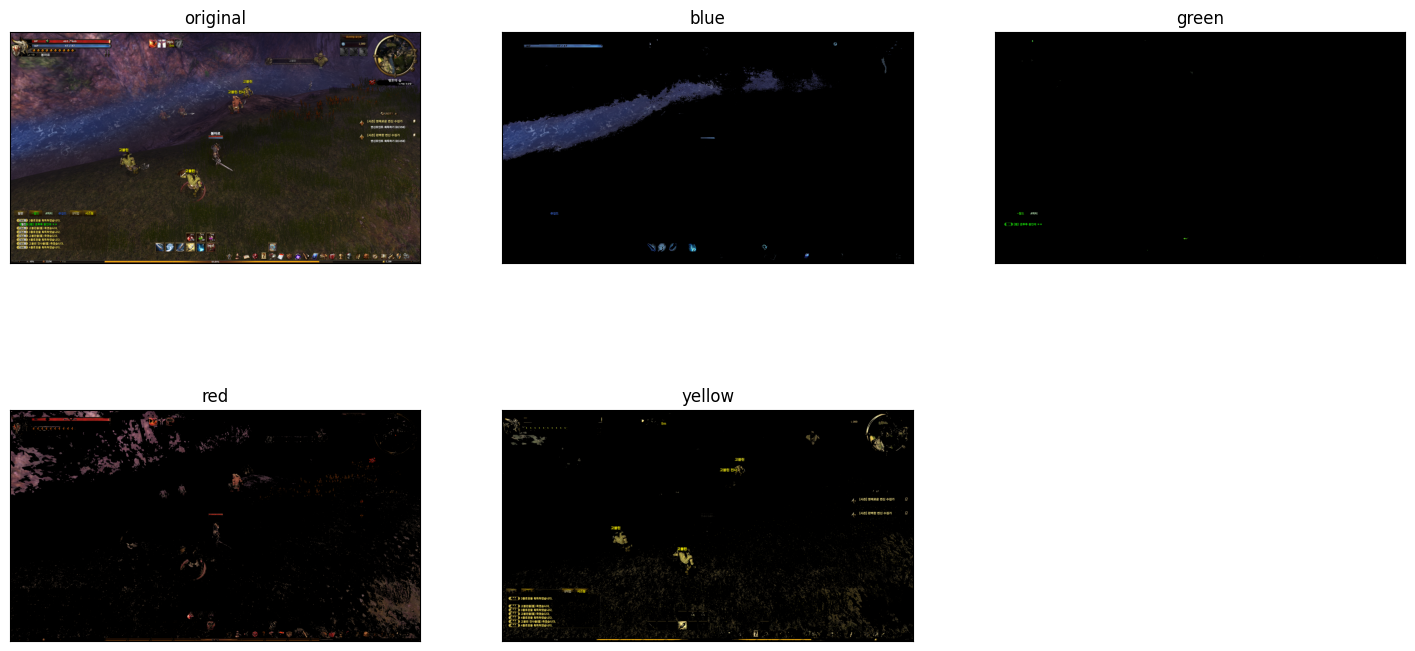

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("C:\source\exercise\opencv_study\screenshot.png")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
plt.figure(figsize=(18,9))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()
